## LOADING LIBRARIES

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.preprocessing import OrdinalEncoder
#from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

## LOADING LABELS DATASET<BR>
HERE WE HAVE A DATASET THAT HAS THE ID/CODE FOR THE DRESSES AND THEIR CORESSPONDING CHARACTERISTIC FEATURES<BR>
LIKE COLOR, FABRIC AND PATTERN<BR>
THE DATA CONSISTS OF WOMEN'S DRESSES AND WAS COLLECTED FROM myntra.com

In [2]:
train = pd.read_excel('Image_Dataset_Details.xlsx')    # reading the csv file
train.head()      # printing first five rows of the file

,id,color,fabric,pattern
0,img-1,blue,cotton,solid
1,img-2,pink,polyster,solid
2,img-3,orange,cotton,solid
3,img-4,black,polyster,solid
4,img-5,green,polyster,solid


## DATA PREPROCESSING

HERE WE CAN SEE THE DIFFERENT TYPES OF COLOR, FABRIC AND PATTERN THAT WE HAVE IN OUR DATASET

In [3]:
print(train['color'].unique())
print(train['fabric'].unique())
print(train['pattern'].unique())

color = train['color'].unique()
fabric = train['fabric'].unique()
pattern = train['pattern'].unique()

['blue' 'pink' 'orange' 'black' 'green' 'yellow' 'red' 'white' 'purple'
 'white ' 'blue ' 'brown ' 'green ' 'pink ' 'black ' 'red ' 'yellow '
 'grey' 'violet' 'orange ' 'grey ']
['cotton' 'polyster' 'ployster' 'silk' 'denim' 'polyester' 'wool']
['solid' 'striped' 'checked' 'printed' 'dyed' 'embroidered']


AS WE ARE USING A CONVOLUTIONAL MODEL, WE NEED TO ENCODE THE STRING DATA SO THAT IT CAN EASILY BE TRAINED THROUGH THE MODEL<BR>
WE ARE USING ORDINAL ENCODER FOR THIS PURPOSE

In [4]:
ord_enc = OrdinalEncoder()
train["color"] = ord_enc.fit_transform(train[["color"]])
train["fabric"] = ord_enc.fit_transform(train[["fabric"]])
train["pattern"] = ord_enc.fit_transform(train[["pattern"]])

DATA AFTER ENCODING

In [5]:
train.head()

,id,color,fabric,pattern
0,img-1,2.0,0.0,4.0
1,img-2,11.0,4.0,4.0
2,img-3,9.0,0.0,4.0
3,img-4,0.0,4.0,4.0
4,img-5,5.0,4.0,4.0


UNQUIE ENCODED VALUE FOR EACH ATTRIBUTE

In [6]:
print(train['color'].unique())
print(train['fabric'].unique())
print(train['pattern'].unique())

color_coded = train['color'].unique()
fabric_coded = train['fabric'].unique()
pattern_coded = train['pattern'].unique()


[ 2. 11.  9.  0.  5. 19. 14. 17. 13. 18.  3.  4.  6. 12.  1. 15. 20.  7.
 16. 10.  8.]
[0. 4. 2. 5. 1. 3. 6.]
[4. 5. 0. 3. 1. 2.]


HERE WE CREATE A DICTONARY SO THAT WE CAN COMPARE AND GET THE ORIGINAL DATA VALUE FROM THE ENCODED ONES

In [7]:
color_dict = res = dict(zip(color_coded, color))
fabric_dict = res = dict(zip(fabric_coded, fabric))
pattern_dict = res = dict(zip(pattern_coded, pattern))

print(color_dict)
print(fabric_dict)
print(pattern_dict)

{2.0: 'blue', 11.0: 'pink', 9.0: 'orange', 0.0: 'black', 5.0: 'green', 19.0: 'yellow', 14.0: 'red', 17.0: 'white', 13.0: 'purple', 18.0: 'white ', 3.0: 'blue ', 4.0: 'brown ', 6.0: 'green ', 12.0: 'pink ', 1.0: 'black ', 15.0: 'red ', 20.0: 'yellow ', 7.0: 'grey', 16.0: 'violet', 10.0: 'orange ', 8.0: 'grey '}
{0.0: 'cotton', 4.0: 'polyster', 2.0: 'ployster', 5.0: 'silk', 1.0: 'denim', 3.0: 'polyester', 6.0: 'wool'}
{4.0: 'solid', 5.0: 'striped', 0.0: 'checked', 3.0: 'printed', 1.0: 'dyed', 2.0: 'embroidered'}


In [8]:
train.columns

Index(['id', 'color', 'fabric', 'pattern'], dtype='object')

LOADING OUR IMAGE DATASET

In [9]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('dress_training/'+train['id'][i]+'.png',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 200/200 [00:01<00:00, 143.81it/s]


SHAPE OF OUR IMAGE DATASET

In [10]:
X.shape

(200, 400, 400, 3)

DATA EXAMPLE

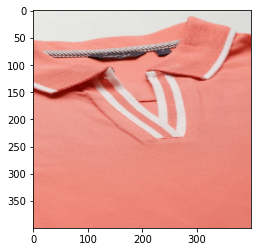

In [11]:
plt.imshow(X[2])

HERE WE CAN SEE THE CHARACTERISTIC FEATURE OF THE IMAGE SHOWN ABOVE

In [12]:
print(color_dict[train['color'][2]])
print(fabric_dict[train['fabric'][2]])
print(pattern_dict[train['pattern'][2]])

orange
cotton
solid


HERE WE REMOVE THE id COLUMN FORM THE TRAIN FILE AND CONVERT THE REMAINING COLUMNS TO AN ARRAY WHICH WILL BE  TARGET FOR OUR IMAGES

In [13]:
y = np.array(train.drop(['id'],axis=1))
y.shape

(200, 3)

NEXT WE RANDOMLY SEPARATE 10% OF THE IMAGES AS OUR VALIDATION SET

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## MODEL BUILDING<BR>
NEXT STEP IS TO DEFINE THE ARCHITECTURE OF OUR MODEL

In [15]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

THE MODEL SUMMARY TELLS US THE NUMBER OF LAYERS AND THE TOTAL TRAINABLE PARAMETERS

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 396, 396, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 198, 198, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 198, 198, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 194, 194, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 97, 97, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 97, 97, 32)        0

NEXT WE COMPILE OUR MODEL WITH binary_crossentropy AS THE LOSS FUNCTION AND adam AS THE OPTIMIZER

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

FINALLY WE TRAING THE MODEL FOR 10 EPOCHS AND ALSO PASS THE VALIDATION DATA WHICH WE CREATED EARLIER IN ORDER TO VALIDATE THE MODEL'S PERFORMANCE

In [18]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
3/3 [==============================] - 21s 6s/step - loss: -346.8076 - accuracy: 0.6625 - val_loss: -1204.7839 - val_accuracy: 0.7250
Epoch 2/10
3/3 [==============================] - 16s 5s/step - loss: -10967.9258 - accuracy: 0.8000 - val_loss: -23880.2559 - val_accuracy: 0.7250
Epoch 3/10
3/3 [==============================] - 15s 5s/step - loss: -98790.9219 - accuracy: 0.8062 - val_loss: -185545.3125 - val_accuracy: 0.7250
Epoch 4/10
3/3 [==============================] - 15s 5s/step - loss: -630521.5000 - accuracy: 0.8062 - val_loss: -906848.8125 - val_accuracy: 0.7250
Epoch 5/10
3/3 [==============================] - 15s 5s/step - loss: -2335311.2500 - accuracy: 0.8000 - val_loss: -3542087.5000 - val_accuracy: 0.7250
Epoch 6/10
3/3 [==============================] - 15s 5s/step - loss: -8004637.0000 - accuracy: 0.8000 - val_loss: -11784066.0000 - val_accuracy: 0.7250
Epoch 7/10
3/3 [==============================] - 16s 5s/step - loss: -23926304.0000 - accuracy: 0.8062

AS WE CAN SEE THAT WE HAVE ACHIEVED AN ACCURACY OF 80.62%.<BR>
AND AS THE AMOUNT OF TRAINING DATA INCREASES WE CAN IMPROVE OUR MODEL BY CHANGING THE AMOUNT AND TYPE OF LAYERS AND<BR>
THUS CAN EFFECTIVELY INCREASE OUR PERFORMANCE.